In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import medfilt

%matplotlib widget

freqs = np.linspace(0, 1250, 2**17)
startFreq   = 50 #MHz
stopFreq    = 1100 #MHz

startIdx    = int(startFreq/1250*2**17)
stopIdx     = int(stopFreq/1250*2**17)

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

In [2]:
# 10_15_23
### All amp stuff out of room. chain: patch, 1012, 1r5+, qt. 4 MC gold attenuators, 10, 6, 3, 1 dB, pink cable, MC silver 1dB att. 1200+ filter, teledyne
### 100k avg. 

fileName        = 'termOnPatch_1.npy'
termOnPatch = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = '6ftCable_withTerm_2.npy'
termOnCable = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = '6ftCable_withShort_3.npy'
shortOnCable = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = '6ftCable_withOpen_4.npy'
openOnCable = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = '6ftCable_isolator_withOpen_5.npy'
openOnCableIsolator = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = '6ftCable_isolator_withShort_6.npy'
shortOnCableIsolator = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = '6ftCable_isolatorOnFarSide_withShort_7.npy'
shortOnCableIsolatorFarSide = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Circ port 1,2,3 = [6ft cable, patch, term (via patch)]
fileName        = '6ftCable_circ_withShort_8.npy' 
shortOnCableCirc = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Circ port 1,2,3 = [6ft cable, patch, NS with 12dB att (via patch)]
fileName        = '6ftCable_circ_withNS_12dBatt_9.npy' 
shortOnCableCirc_NS12dBatt = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Circ port 1,2,3 = [6ft cable, patch, NS with 0dB att (via patch)]
fileName        = '6ftCable_circ_withNS_0dBatt_10.npy' 
shortOnCableCirc_NS0dBatt = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']


#Circ port 1,2,3 = [6ft cable, patch, LN2, no att (via patch)]
fileName        = '6ftCable_circ_withLN2_11.npy' 
shortOnCableCirc_LN2 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Circ port 1,2,3 = [vivaldi, patch, LN2, no att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_withLN2_12.npy' 
Vivaldi_LN2 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Circ port 1,2,3 = [vivaldi, patch, term RT, no att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_RT_13.npy' 
Vivaldi_RT = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Circ port 1,2,3 = [vivaldi, patch, NS hot (testing for att, 13dB) (via patch)]
#10k avg
fileName        = 'vivaldi_circ_hotTesting.npy' 
Vivaldi_hotTesting_13dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# to get 17dB use MC silver attenuators and Narda 0.1dB step atteunator. 12+3+2+Narda. 
# Photo on phone, 10_16_23
# Circ port 1,2,3 = [vivaldi, patch, NS , 17.5dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_17.5dBatt_14.npy' 
Vivaldi_hot_17p5dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#change narda
#Circ port 1,2,3 = [vivaldi, patch, NS , 17.6 att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_17.6dBatt_15.npy' 
Vivaldi_hot_17p6dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#change narda
#Circ port 1,2,3 = [vivaldi, patch, NS, 17.4 att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_17.4dBatt_16.npy' 
Vivaldi_hot_17p4dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#change narda
#Circ port 1,2,3 = [vivaldi, patch, NS, 17.3 att (via patch)]
#40k avg, testing
fileName        = 'vivaldi_circ_NS_17.3dBatt_17.npy' 
Vivaldi_hot_17p3dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#change narda
#Circ port 1,2,3 = [vivaldi, patch, NS, 17.0 att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_17p0dBatt_17.npy' 
Vivaldi_hot_17p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#change narda
#Circ port 1,2,3 = [vivaldi, patch, NS, 18.0 dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_18p0dBatt_18.npy' 
Vivaldi_hot_18p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#12 + 3 dB + narda = 0
#Circ port 1,2,3 = [vivaldi, patch, NS, 15.0 dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_15p0dBatt_19.npy' 
Vivaldi_hot_15p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#12 + 3 dB + narda = 1
#Circ port 1,2,3 = [vivaldi, patch, NS, 16.0 dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_16p0dBatt_20.npy' 
Vivaldi_hot_16p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# 12dB + 7 dB + narda 0 
#Circ port 1,2,3 = [vivaldi, patch, NS, 19.0 dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_19p0dBatt_21.npy' 
Vivaldi_hot_19p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# 12dB + 7 dB + narda 1
#Circ port 1,2,3 = [vivaldi, patch, NS, 16.0 dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_20p0dBatt_22.npy' 
Vivaldi_hot_20p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# put heat sync in stryfoam dewar in room
#Circ port 1,2,3 = [vivaldi, patch, term. RT (via patch)]
#1M avg
fileName        = 'vivaldi_circ_termRT_heatSyncRT_23.npy' 
heatSyncRT = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# put heat sync in stryfoam dewar in room. Fill dewar with LN2
#Circ port 1,2,3 = [vivaldi, patch, term. RT (via patch)]
#1M avg
fileName        = 'vivaldi_circ_termRT_heatSyncLN2_24.npy' 
heatSyncCold = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# REDO put heat sync in stryfoam dewar in room. Fill dewar with LN2
#Circ port 1,2,3 = [vivaldi, patch, term. RT (via patch)]
#1M avg
fileName        = 'vivaldi_circ_termRT_heatSyncLN2_repeat_25.npy' 
heatSyncCold2 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# leave cold heat sync in place, turn on light
#Circ port 1,2,3 = [vivaldi, patch, term. RT (via patch)]
#1M avg
fileName        = 'vivaldi_circ_termRT_lightOn_26.npy' 
light75W = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']


# leave cold heat sync in place, replace light with 300W
#Circ port 1,2,3 = [vivaldi, patch, term. RT (via patch)]
#1M avg
fileName        = 'vivaldi_circ_termRT_300WLightOn_27.npy' 
light300W = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# leave cold heat sync in place, replace 300W light with 75W
#Circ port 1,2,3 = [vivaldi, patch, term. RT (via patch)]
#1M avg
fileName        = 'vivaldi_circ_termRT_75WLightOn_repeat_28.npy' 
light75W2 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# light off, noise source with 12dB MC silver and HP
#Circ port 1,2,3 = [vivaldi, patch, NS with att (via patch)]
#40k avg
fileName        = 'vivaldi_circ_NS_12dB_29.npy' 
vivaldi_hot_12 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_13dB_30.npy' 
vivaldi_hot_13 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_14dB_31.npy' 
vivaldi_hot_14 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_15dB_32.npy' 
vivaldi_hot_15 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_16dB_33.npy' 
vivaldi_hot_16 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_17dB_34.npy' 
vivaldi_hot_17 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_18dB_35.npy' 
vivaldi_hot_18 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_19dB_36.npy' 
vivaldi_hot_19 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_20dB_37.npy' 
vivaldi_hot_20 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_21dB_38.npy' 
vivaldi_hot_21 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_22dB_39.npy' 
vivaldi_hot_22 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_23dB_40.npy' 
vivaldi_hot_23 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

fileName        = 'vivaldi_circ_NS_24dB_41.npy' 
vivaldi_hot_24 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#turn off NS
fileName        = 'vivaldi_circ_NS_off_41.npy' 
vivaldi_off = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#NS right on patch (no att)
fileName        = 'vivaldi_circ_NS_0dB_42.npy' 
vivaldi_hot_0 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#NS right on patch (6dB MC silver att)
fileName        = 'vivaldi_circ_NS_6dB_44.npy' 
vivaldi_hot_6 = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']


#open (cap, not real open) on patch
fileName        = 'vivaldi_circ_open_45.npy' 
vivaldi_open = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#short
fileName        = 'vivaldi_circ_short_46.npy' 
vivaldi_short = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']


#remove circ. Vivaldi right to patch
fileName        = 'vivald_47.npy' 
vivaldi = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

s11_lowRes_df          = pd.read_csv('./data_10_15_23_gitignore/s11_vivaldiInRoom_1Mto6GHz_4501pts_10_16_23.csv')
s11_lowRes_interp = np.interp(freqs, s11_lowRes_df['Frequency']/1e6, s11_lowRes_df['S11_Magnitude (linear)'])

s11_medRes_df          = pd.read_csv('./data_10_15_23_gitignore/s11_vivaldiInRoom_1Mto1250MHz_4501pts_10_16_23.csv')
s11_medRes_interp = np.interp(freqs, s11_medRes_df['Frequency']/1e6, s11_medRes_df['S11_Magnitude (linear)'])

s11_highRes_df          = pd.read_csv('./data_10_15_23_gitignore/s11_vivaldiInRoom_400Mto600MHz_4501pts_10_16_23.csv')
s11_highRes_interp = np.interp(freqs, s11_highRes_df['Frequency']/1e6, s11_highRes_df['S11_Magnitude (linear)'])


#uwb_VSWR_df          = pd.read_csv('./data_10_15_23_gitignore/rfspace_uwb5_vswr_digitized.csv')
#uwb_VSWR_interp = np.interp(freqs, uwb_VSWR_df['Frequency(MHz)'], uwb_VSWR_df['VSWR'])
#uwb_s11_interp  = (uwb_VSWR_interp - 1)/(uwb_VSWR_interp + 1)

uwb_VSWR_df          = pd.read_csv('./data_10_15_23_gitignore/rfspace_uwb5_vswr_digitized.csv')
uwb_VSWR_df.sort_values('Frequency(MHz)', inplace = True)
interp_function = interp1d(uwb_VSWR_df['Frequency(MHz)'], uwb_VSWR_df['VSWR'], kind='linear', fill_value="extrapolate")
uwb_VSWR_interp = interp_function(freqs)
uwb_s11_interp  = (uwb_VSWR_interp - 1)/(uwb_VSWR_interp + 1)

#Add minicircuits 10dB amp as front end amp
fileName        = 'vivaldi_extra10dBMcAmp_48.npy' 
vivaldi_mc10dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']/(10**(1.3))

#Term. minicircuits 10dB amp as front end amp
fileName        = 'term_extra10dBMcAmp_49.npy' 
term_mc10dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']/(10**(1.3))

###backwards amp tests###
#Term
fileName        = 'backwardsAmp_50ohms_50.npy' 
backwardTerm = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Open
fileName        = 'backwardsAmp_open_51.npy' 
backwardOpen = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Short
fileName        = 'backwardsAmp_short_52.npy' 
backwardShort = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Amazon Off
fileName        = 'backwardsAmp_AmazonOff_53.npy' 
backwardAmazonOff = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#Amazon on 12V
fileName        = 'backwardsAmp_AmazonOn_54.npy' 
backwardAmazonOn = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#1R5+  Off
fileName        = 'backwardsAmp_1R5Off_55.npy' 
backward1R5Off = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#1R5+ on 12V
fileName        = 'backwardsAmp_1R5On_56.npy' 
backward1R5On = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#14012-A  Off
fileName        = 'backwardsAmp_14012Off_57.npy' 
backward14012Off = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#14012-A on 12V
fileName        = 'backwardsAmp_14012On_58.npy' 
backward14012On = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#1012-G  Off
fileName        = 'backwardsAmp_1012Off_59.npy' 
backward1012Off = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

#1012-G on 12V
fileName        = 'backwardsAmp_1012On_60.npy' 
backward1012On = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

### Change front end amp test ####
### 1012E
#bicon
fileName        = 'frontEndAmpTest_1012E_bicon_61.npy' 
frontEnd_1012E_bicon = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#vivaldi
fileName        = 'frontEndAmpTest_1012E_vivaldi_62.npy' 
frontEnd_1012E_vivaldi = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#50ohms
fileName        = 'frontEndAmpTest_1012E_term_63.npy' 
frontEnd_1012E_term = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#short
fileName        = 'frontEndAmpTest_1012E_short_64.npy' 
frontEnd_1012E_short = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#open
fileName        = 'frontEndAmpTest_1012E_open_65.npy' 
frontEnd_1012E_open = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

### 1012G
#bicon
fileName        = 'frontEndAmpTest_1012G_bicon_66.npy' 
frontEnd_1012G_bicon = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#vivaldi
fileName        = 'frontEndAmpTest_1012G_vivaldi_67.npy' 
frontEnd_1012G_vivaldi = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#50ohms
fileName        = 'frontEndAmpTest_1012G_term_68.npy' 
frontEnd_1012G_term = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#open
fileName        = 'frontEndAmpTest_1012G_open_69.npy' 
frontEnd_1012G_open = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

### 1R5+-A
#bicon
fileName        = 'frontEndAmpTest_1r5_bicon_70.npy' 
frontEnd_1R5_bicon = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#vivaldi
fileName        = 'frontEndAmpTest_1r5_vivaldi_71.npy' 
frontEnd_1R5_vivaldi = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#50ohms
fileName        = 'frontEndAmpTest_1r5_term_72.npy' 
frontEnd_1R5_term = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
#open
fileName        = 'frontEndAmpTest_1r5_open_73.npy' 
frontEnd_1R5_open = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

### ZX60
# bicon
fileName = 'frontEndAmpTest_zx60_bicon_74.npy' 
frontEnd_zx60_bicon = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
# vivaldi
fileName = 'frontEndAmpTest_zx60_vivaldi_75.npy' 
frontEnd_zx60_vivaldi = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
# 50ohms
fileName = 'frontEndAmpTest_zx60_term_76.npy' 
frontEnd_zx60_term = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
# open
fileName = 'frontEndAmpTest_zx60_open_77.npy' 
frontEnd_zx60_open = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']

# Amazon
# bicon
fileName = 'frontEndAmpTest_amazon_bicon_78.npy' 
frontEnd_amazon_bicon = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
# vivaldi
fileName = 'frontEndAmpTest_amazon_vivaldi_79.npy' 
frontEnd_amazon_vivaldi = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
# 50ohms
fileName = 'frontEndAmpTest_amazon_term_80.npy' 
frontEnd_amazon_term = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
# open
fileName = 'frontEndAmpTest_amazon_open_81.npy' 
frontEnd_amazon_open = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']



Correlation coefficient: 0.9001644032484523


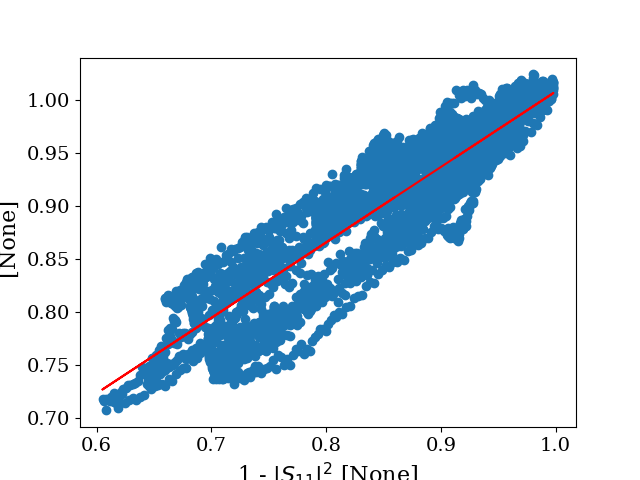

Slope: 0.7112625048014678
Intercept: 0.296609926709989


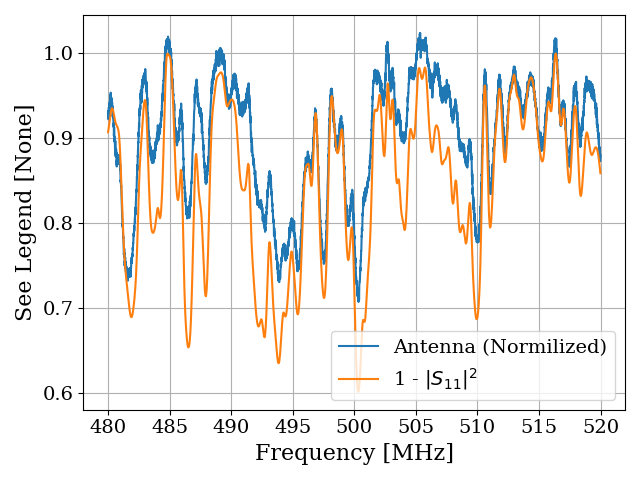

In [68]:
#thesis plots
plt.close('all')

if 0:
    startFreq   = 485 #MHz
    stopFreq    = 525 #MHz
    startIdx    = int(startFreq/1250*2**17)
    stopIdx     = int(stopFreq/1250*2**17)

    plt.figure()
    #plt.title('Coax resonator, 500MHz Circulator')
    plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc/termOnPatch)[startIdx:stopIdx], label = 'Room Temp.')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.grid()
    plt.tight_layout()

if 0:
    startFreq   = 40 #MHz
    stopFreq    = 1100 #MHz
    startIdx    = int(startFreq/1250*2**17)
    stopIdx     = int(stopFreq/1250*2**17)

    plt.figure()
    #plt.title('Open And Short on Cable (Normilized)')
    plt.plot(freqs[startIdx:stopIdx], (shortOnCable/termOnPatch)[startIdx:stopIdx], label = 'Short')
    plt.plot(freqs[startIdx:stopIdx], (openOnCable/termOnPatch)[startIdx:stopIdx], label = 'Open')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    #plt.ylabel('PSD (Normilized)')
    plt.legend()
    plt.grid()
    plt.tight_layout()


if 0:
    startFreq   = 480 #MHz
    stopFreq    = 520 #MHz
    startIdx    = int(startFreq/1250*2**17)
    stopIdx     = int(stopFreq/1250*2**17)
    plt.figure()
    plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_RT/termOnPatch))[startIdx:stopIdx], label = "With Circulator")
    plt.plot(freqs[startIdx:stopIdx], ((vivaldi/termOnPatch) )[startIdx:stopIdx], label = "Without Circulator")
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.legend(loc = 'lower right')
    plt.tight_layout()
    plt.grid()

if 0:
    startFreq   = 40 #MHz
    stopFreq    = 1100 #MHz
    startIdx    = int(startFreq/1250*2**17)
    stopIdx     = int(stopFreq/1250*2**17)
    plt.figure()
    #plt.plot(freqs[startIdx:105000:5], (backward1012Off/backwardTerm)[startIdx:105000:5], linewidth = 2, label = 'Amp Off')
    plt.plot(freqs[startIdx:105000:5], (backward1012On/backwardTerm)[startIdx:105000:5], linewidth = 2,  label = '1012-G Amp')
    #plt.plot(freqs[startIdx:105000:500], backwardTerm[startIdx:105000:500], '--', label = '50 Ohms')
    #plt.plot(freqs[startIdx:105000:5], (backwardOpen/backwardTerm)[startIdx:105000:5], '--', label = 'Open')
    #plt.plot(freqs[startIdx:105000:5], (backwardShort/backwardTerm)[startIdx:105000:5], '--', label = 'Short')
    plt.plot(freqs[startIdx:105000:500], medfilt((backwardShort/backwardTerm)[startIdx:105000], kernel_size=151)[::500], '--', label='Short')
    plt.plot(freqs[startIdx:105000:500], medfilt((backwardOpen/backwardTerm)[startIdx:105000], kernel_size=151)[::500], '--', label='Open')

    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

if 0:   #vivaldi with different temperature terminator
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    # Frequency range and index calculations
    startFreq   = 480  # MHz
    stopFreq    = 520  # MHz
    startIdx    = int(startFreq / 1250 * 2**17)
    stopIdx     = int(stopFreq / 1250 * 2**17)

    # Define the attenuation values and corresponding arrays
    attenuation_dBs = [12, 14, 16, 18, 20, 24]
    vivaldi_hot_arrays = [vivaldi_hot_12, vivaldi_hot_14, vivaldi_hot_16,
                        vivaldi_hot_18, vivaldi_hot_20, vivaldi_hot_24]

    # Define the color palette using the "coolwarm" colormap
    colors = cm.coolwarm_r(np.linspace(0, 1, len(attenuation_dBs) + 1))

    # Create the plot
    plt.figure()

    # Plot each curve using a for loop
    for i, (dB, color) in enumerate(zip(attenuation_dBs, colors)):
        L = 10**(dB/10)
        T_out = (12104/L) + (294 * (1 - 1/L))
        #print(f'idx={i}')
        print(f'dB = {dB}')
        #print(f'L = {L}')
        print(f'T_out = {T_out}')
        plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_arrays[i]/termOnPatch)[startIdx:stopIdx], label=f'{int(T_out)}° K', color=color)


    # Plot the reference curve for the Terminator at 294 K
    plt.plot(freqs[startIdx:stopIdx], (vivaldi_off/termOnPatch)[startIdx:stopIdx], label='294° K', color=colors[-1])

    # Plot formatting
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.grid()
    plt.tight_layout()
    plt.legend(loc = 'upper right')
    plt.show()


    # Define the attenuation values and corresponding arrays
    attenuation_dBs = [0, 6, 12, 18]
    vivaldi_hot_arrays = [vivaldi_hot_0, vivaldi_hot_6, vivaldi_hot_12, vivaldi_hot_18]

    # Define the color palette using the "coolwarm" colormap
    colors = cm.coolwarm_r(np.linspace(0, 1, len(attenuation_dBs) + 1))

    # Create the plot
    plt.figure()

    # Plot each curve using a for loop
    for i, (dB, color) in enumerate(zip(attenuation_dBs, colors)):
        L = 10**(dB/10)
        T_out = (12104/L) + (294 * (1 - 1/L))
        #print(f'idx={i}')
        print(f'dB = {dB}')
        #print(f'L = {L}')
        print(f'T_out = {T_out}')
        plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_arrays[i]/termOnPatch)[startIdx:stopIdx], label=f'{int(T_out)}° K', color=color)


    # Plot the reference curve for the Terminator at 294 K
    plt.plot(freqs[startIdx:stopIdx], (vivaldi_off/termOnPatch)[startIdx:stopIdx], label='294 K', color=colors[-1])

    # Plot formatting
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.grid()
    plt.tight_layout()
    plt.legend(loc = 'upper right')
    plt.show()
    plt.semilogy()


if 0: 
        # Frequency range and index calculations
    startFreq   = 480  # MHz
    stopFreq    = 520  # MHz
    startIdx    = int(startFreq / 1250 * 2**17)
    stopIdx     = int(stopFreq / 1250 * 2**17)

    cmap = plt.get_cmap('coolwarm')
    plt.figure()
    plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p5dB/Vivaldi_RT) )[startIdx:stopIdx], label='504° K', color=cmap(1.0))  # Warmest
    plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_LN2/Vivaldi_RT) )[startIdx:stopIdx], label='77° K', color=cmap(0.0))  # Coldest
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.grid()
    plt.tight_layout()
    plt.legend()


    plt.figure()
    plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p5dB + Vivaldi_LN2)/(Vivaldi_RT ) )[startIdx:stopIdx])
    plt.xlabel('Frequency [MHz]')
    plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
    plt.grid()
    plt.tight_layout()
    #plt.legend()

if 1:  #s11
    startFreq   = 480  # MHz
    stopFreq    = 520  # MHz
    startIdx    = int(startFreq / 1250 * 2**17)
    stopIdx     = int(stopFreq / 1250 * 2**17)
    plt.figure()
    #plt.title('Vivaldi, 1-s11^2 and Noise (Amp Out Of Room)')
    #plt.plot(freqs[startIdx:stopIdx], (termOnPatch)[startIdx:stopIdx]/2.2e-11, label = 'Term')
    #plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT/termOnPatch)[startIdx:stopIdx], label = 'Antenna and Circulator (Normilized)')
    plt.plot(freqs[startIdx:stopIdx], (vivaldi/termOnPatch)[startIdx:stopIdx], label = 'Antenna (Normilized)')
    plt.plot(freqs[startIdx:stopIdx], (1-(s11_highRes_interp)**2)[startIdx:stopIdx], label = r'1 - $|S_{11}|^2$ ')
    #plt.plot(freqs[startIdx:stopIdx], (1-(s11_medRes_interp)**2)[startIdx:stopIdx], label = r'1 - $|S_{11}|^2$ ')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('See Legend [None]')
    plt.legend()
    plt.grid()
    plt.tight_layout()

    plt.figure()
    #plt.scatter((vivaldi/termOnPatch)[startIdx:stopIdx],(1-(s11_medRes_interp)**2)[startIdx:stopIdx])

    # Extract the relevant slices
    y_data = (vivaldi / termOnPatch)[startIdx:stopIdx]
    x_data = (1 - (s11_medRes_interp)**2)[startIdx:stopIdx]
    # Compute the Pearson correlation coefficient
    correlation_matrix = np.corrcoef(x_data, y_data)
    correlation = correlation_matrix[0, 1]

    print("Correlation coefficient:", correlation)

    # Compute the best-fit line (linear regression)
    slope, intercept = np.polyfit(x_data, y_data, 1)

    # Create the fitted line
    y_fit = slope * x_data + intercept

    # Plot the scatter and the best-fit line
    plt.scatter(x_data, y_data)
    plt.plot(x_data, y_fit, color='red')#, label=f'y={slope:.2f}x + {intercept:.2f}')
    plt.ylabel('Antenna, Normalized to Terminator \n [None]')
    plt.xlabel(r'1 - $|S_{11}|^2$ [None]')
    #plt.legend()
    plt.show()
    plt.grid()

    # Print the slope and intercept
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    plt.tight_layout()

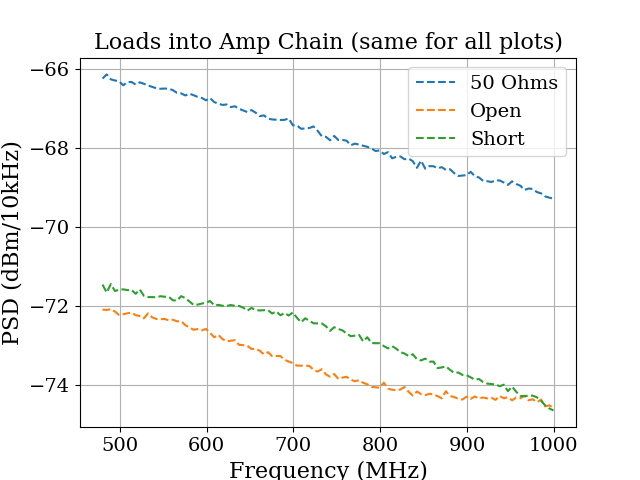

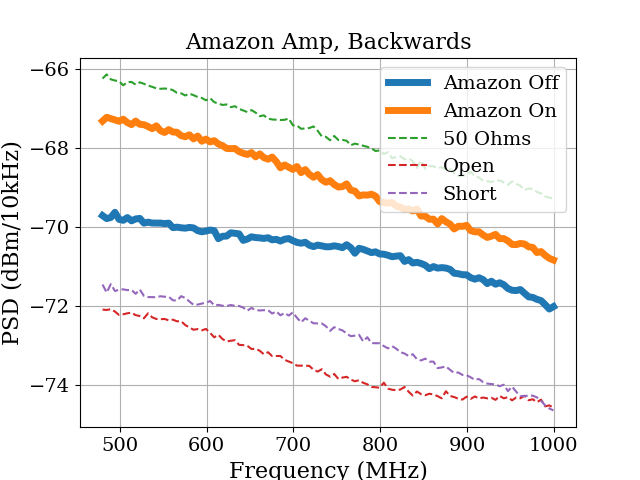

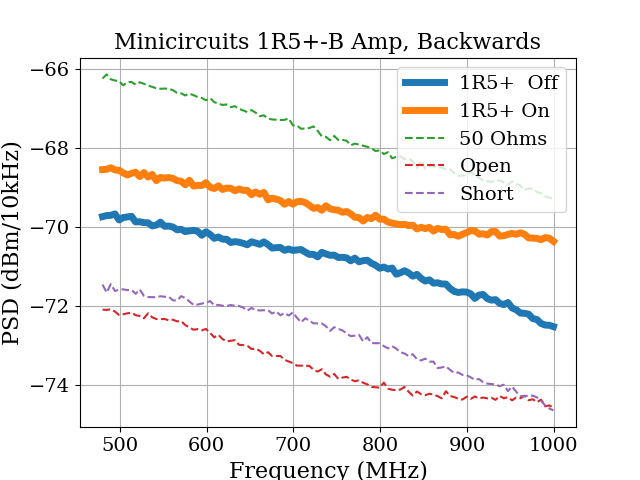

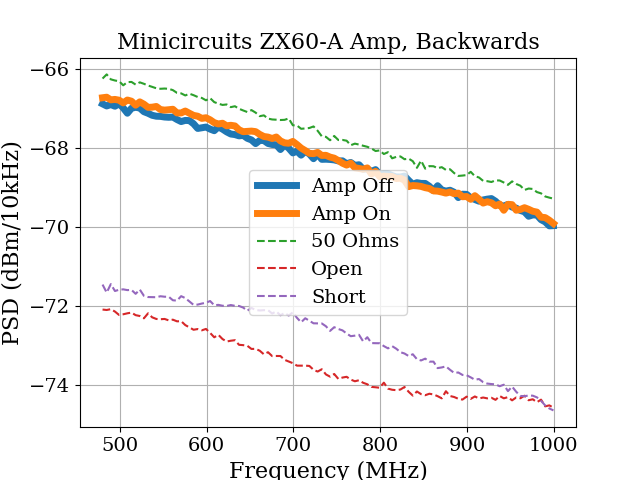

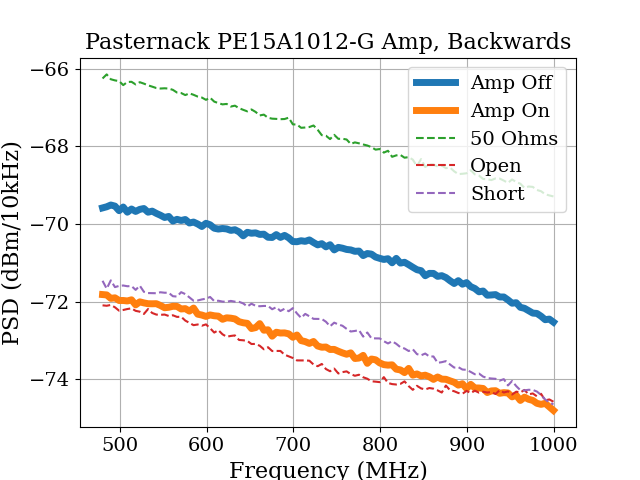

In [4]:
#test effects of different amps. 

# This cell: hang different amps backwards to see what comes out of input
#                    |     ROOM    |
#   ADC---<|--<|-----|--|>--50     | 
#      1R5+^   ^1012 |  ^AUT       |

# amp chain: 1012, 1R5+ 6,3,1dB gold attenuator (total of 67dB gain), ~10kHz RBW
# open, 50, 1012-E, 1r5+-B, amazon, 14012L-A (all amps on and off)
#

plt.close('all')

plt.figure()
plt.title('Loads into Amp Chain (same for all plots)')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardTerm)[startIdx:105000:500], '--', label = '50 Ohms')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardOpen)[startIdx:105000:500], '--', label = 'Open')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardShort)[startIdx:105000:500], '--', label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Amazon Amp, Backwards')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardAmazonOff)[startIdx:105000:500], linewidth = 5, label = 'Amazon Off')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardAmazonOn)[startIdx:105000:500], linewidth = 5,  label = 'Amazon On')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardTerm)[startIdx:105000:500], '--', label = '50 Ohms')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardOpen)[startIdx:105000:500], '--', label = 'Open')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardShort)[startIdx:105000:500], '--', label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)


plt.figure()
plt.title('Minicircuits 1R5+-B Amp, Backwards')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backward1R5Off)[startIdx:105000:500], linewidth = 5, label = '1R5+  Off')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backward1R5On)[startIdx:105000:500], linewidth = 5,  label = '1R5+ On')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardTerm)[startIdx:105000:500], '--', label = '50 Ohms')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardOpen)[startIdx:105000:500], '--', label = 'Open')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardShort)[startIdx:105000:500], '--', label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Minicircuits ZX60-A Amp, Backwards')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backward14012Off)[startIdx:105000:500], linewidth = 5, label = 'Amp Off')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backward14012On)[startIdx:105000:500], linewidth = 5,  label = 'Amp On')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardTerm)[startIdx:105000:500], '--', label = '50 Ohms')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardOpen)[startIdx:105000:500], '--', label = 'Open')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardShort)[startIdx:105000:500], '--', label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Pasternack PE15A1012-G Amp, Backwards')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backward1012Off)[startIdx:105000:500], linewidth = 5, label = 'Amp Off')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backward1012On)[startIdx:105000:500], linewidth = 5,  label = 'Amp On')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardTerm)[startIdx:105000:500], '--', label = '50 Ohms')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardOpen)[startIdx:105000:500], '--', label = 'Open')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*backwardShort)[startIdx:105000:500], '--', label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

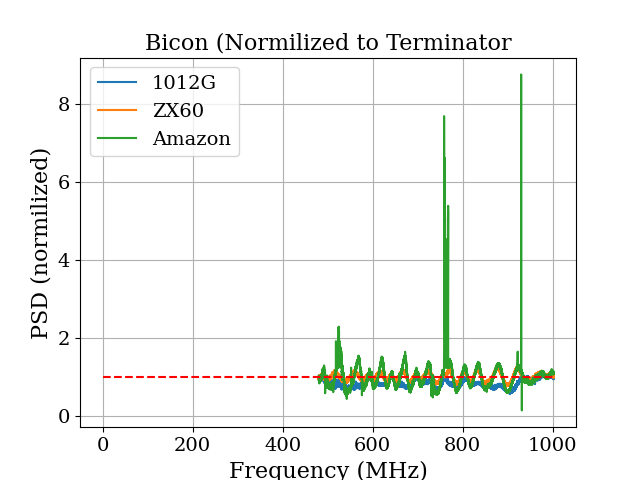

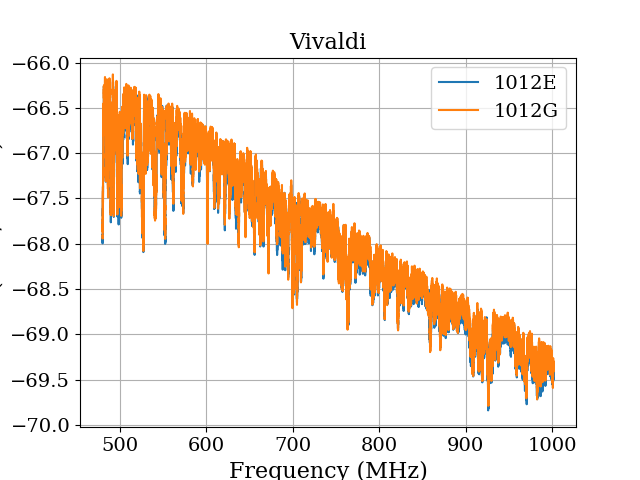

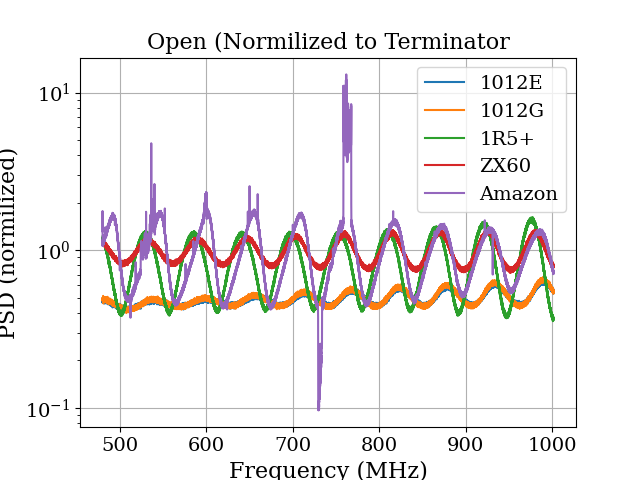

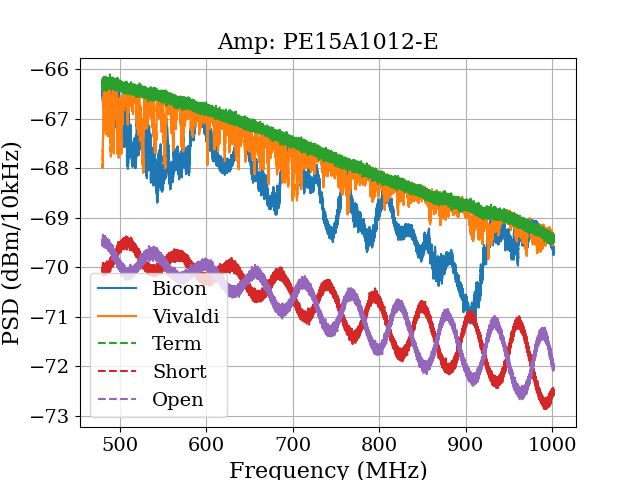

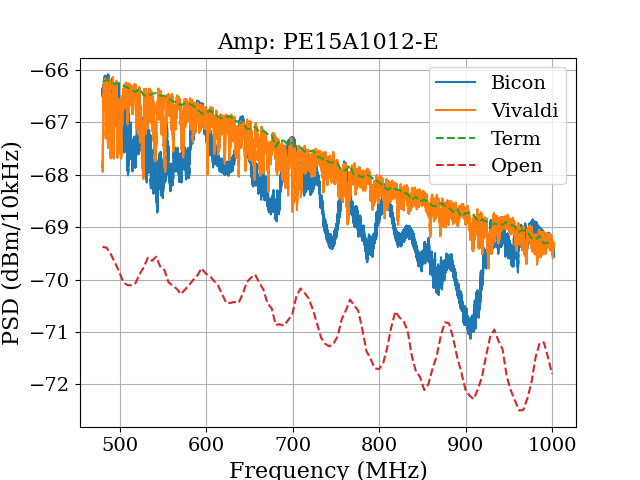

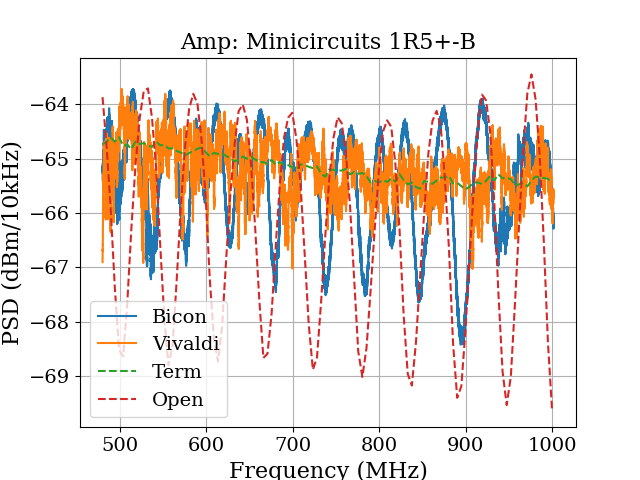

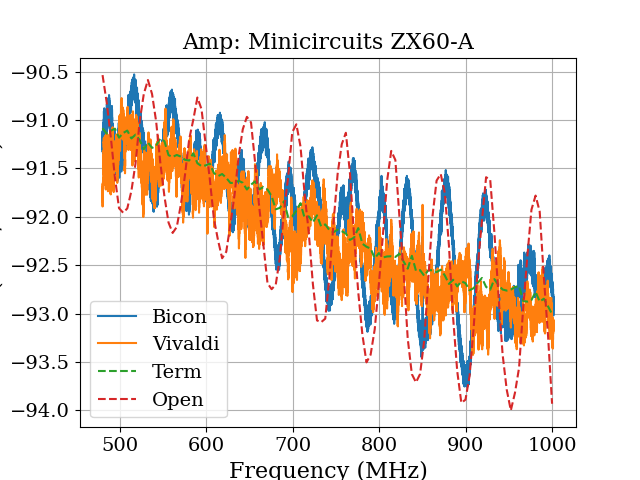

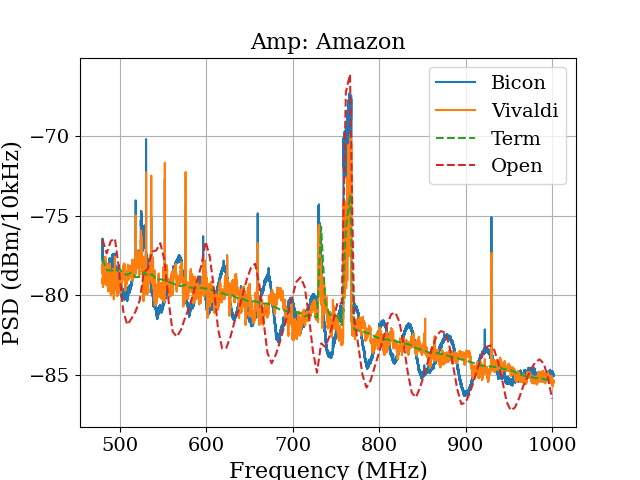

In [5]:
#test effects of different amps. 
# lights off, nothing on in room

# This cell: Change front end amp and load. 
# 5 Amps Under Test (AUT): 1012-G, 1012-E, 1r5+-B, amazon, 14012L-A
# 4 loads: open, 50, vivaldi, bicon 

#                    |       ROOM   |
#   ADC---<|--<|-----|------"load"  | 
#      1R5+^   ^AUT  |              |

# amp chain: AUT, 1R5+ 6,3,1dB gold attenuator (total of 67dB gain), ~10kHz RBW


plt.close('all')

plt.figure()
plt.title('Bicon (Normilized to Terminator')
#plt.plot(freqs[startIdx:105000], (frontEnd_1012E_bicon/frontEnd_1012E_term)[startIdx:105000], label = '1012E')
plt.plot(freqs[startIdx:105000], (frontEnd_1012G_bicon/frontEnd_1012G_term)[startIdx:105000], label = '1012G')
#plt.plot(freqs[startIdx:105000], (frontEnd_1R5_bicon/frontEnd_1R5_term)[startIdx:105000], label = '1R5+')
plt.plot(freqs[startIdx:105000], (frontEnd_zx60_bicon/frontEnd_zx60_term)[startIdx:105000], label = 'ZX60')
plt.plot(freqs[startIdx:105000], (frontEnd_amazon_bicon/frontEnd_amazon_term)[startIdx:105000], label = 'Amazon')
plt.plot((0,1000),(1,1), 'r--')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (normilized)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Vivaldi')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012E_vivaldi)[startIdx:105000], label = '1012E')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012G_vivaldi)[startIdx:105000], label = '1012G')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Open (Normilized to Terminator')
plt.plot(freqs[startIdx:105000], (frontEnd_1012E_open/frontEnd_1012E_term)[startIdx:105000], label = '1012E')
plt.plot(freqs[startIdx:105000], (frontEnd_1012G_open/frontEnd_1012G_term)[startIdx:105000], label = '1012G')
plt.plot(freqs[startIdx:105000], (frontEnd_1R5_open/frontEnd_1R5_term)[startIdx:105000], label = '1R5+')
plt.plot(freqs[startIdx:105000], (frontEnd_zx60_open/frontEnd_zx60_term)[startIdx:105000], label = 'ZX60')
plt.plot(freqs[startIdx:105000], (frontEnd_amazon_open/frontEnd_amazon_term)[startIdx:105000], label = 'Amazon')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (normilized)')
plt.legend()
plt.semilogy()
plt.grid(True)

plt.figure()
plt.title('Amp: PE15A1012-E')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012E_bicon)[startIdx:105000], label = 'Bicon')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012E_vivaldi)[startIdx:105000], label = 'Vivaldi')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012E_term)[startIdx:105000], '--', label = 'Term')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012E_short)[startIdx:105000], '--', label = 'Short')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012E_open)[startIdx:105000], '--', label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Amp: PE15A1012-E')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012G_bicon)[startIdx:105000], label = 'Bicon')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1012G_vivaldi)[startIdx:105000], label = 'Vivaldi')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_1012G_term)[startIdx:105000:500], '--', label = 'Term')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_1012G_open)[startIdx:105000:500], '--', label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

#Note that I also tested this with a single 1R5+ (no attenuators) to see if this was feedback.
# Looks the same but down by 28dB as expected. NOT FEEDBACK
plt.figure()
plt.title('Amp: Minicircuits 1R5+-B')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1R5_bicon)[startIdx:105000], label = 'Bicon')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_1R5_vivaldi)[startIdx:105000], label = 'Vivaldi')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_1R5_term)[startIdx:105000:500], '--', label = 'Term')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_1R5_open)[startIdx:105000:500], '--', label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

plt.figure()
plt.title('Amp: Minicircuits ZX60-A')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_zx60_bicon)[startIdx:105000], label = 'Bicon')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_zx60_vivaldi)[startIdx:105000], label = 'Vivaldi')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_zx60_term)[startIdx:105000:500], '--', label = 'Term')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_zx60_open)[startIdx:105000:500], '--', label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)


plt.figure()
plt.title('Amp: Amazon')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_amazon_bicon)[startIdx:105000], label = 'Bicon')
plt.plot(freqs[startIdx:105000], 10*np.log10(1000*frontEnd_amazon_vivaldi)[startIdx:105000], label = 'Vivaldi')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_amazon_term)[startIdx:105000:500], '--', label = 'Term')
plt.plot(freqs[startIdx:105000:500], 10*np.log10(1000*frontEnd_amazon_open)[startIdx:105000:500], '--', label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dBm/10kHz)')
plt.legend()
plt.grid(True)

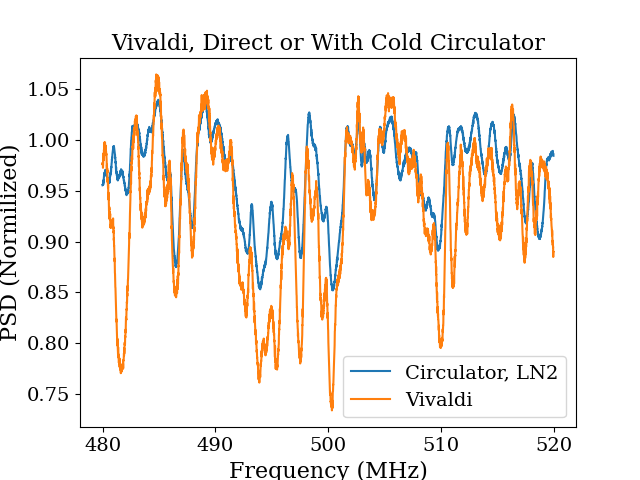

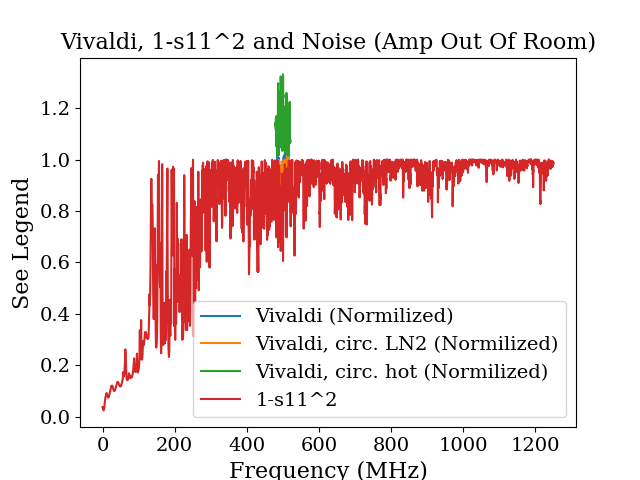

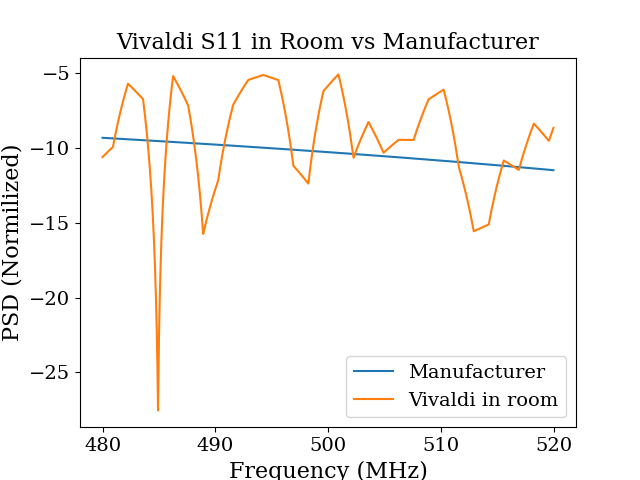

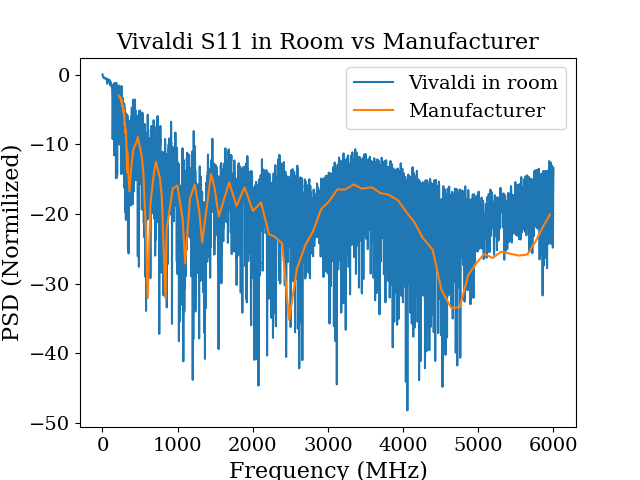

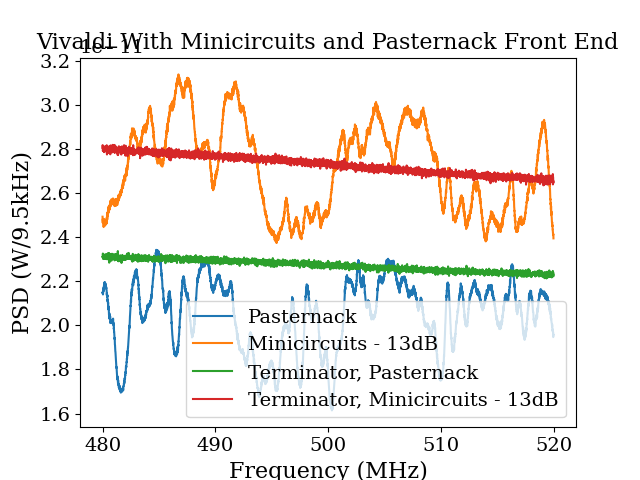

In [6]:
#compare vivaldi (no circ.) with short, with s11

plt.close('all')


plt.figure()
plt.title('Vivaldi, Direct or With Cold Circulator')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2)[startIdx:stopIdx]/2.2e-11, label = 'Circulator, LN2')
plt.plot(freqs[startIdx:stopIdx], (vivaldi)[startIdx:stopIdx]/2.2e-11, label = 'Vivaldi')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

plt.figure()
plt.title('Vivaldi, 1-s11^2 and Noise (Amp Out Of Room)')
#plt.plot(freqs[startIdx:stopIdx], (termOnPatch)[startIdx:stopIdx]/2.2e-11, label = 'Term')
plt.plot(freqs[startIdx:stopIdx], (vivaldi/termOnPatch)[startIdx:stopIdx], label = 'Vivaldi (Normilized)')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2/termOnPatch)[startIdx:stopIdx], label = 'Vivaldi, circ. LN2 (Normilized)')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_15p0dB/termOnPatch)[startIdx:stopIdx], label = 'Vivaldi, circ. hot (Normilized)')
#plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2)[startIdx:stopIdx]/2.2e-11, label = 'Vivaldi, cold term on circ. 3')
#plt.plot(freqs, 1-(s11_highRes_interp)**2, label = '1-s11^2')
plt.plot(freqs, 1-(s11_medRes_interp)**2, label = '1-s11^2')
plt.xlabel('Frequency (MHz)')
plt.ylabel('See Legend')
plt.legend()


plt.figure()
plt.title('Vivaldi S11 in Room vs Manufacturer')
plt.plot(freqs[startIdx:stopIdx], (20*np.log10(uwb_s11_interp))[startIdx:stopIdx], label = 'Manufacturer')
plt.plot(freqs[startIdx:stopIdx], (20*np.log10(s11_lowRes_interp))[startIdx:stopIdx], label = 'Vivaldi in room')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

plt.figure()
plt.title('Vivaldi S11 in Room vs Manufacturer')
plt.plot(s11_lowRes_df['Frequency']/1e6, (20*np.log10(s11_lowRes_df['S11_Magnitude (linear)'])), label = 'Vivaldi in room')
plt.plot(uwb_VSWR_df['Frequency(MHz)'], (20*np.log10((uwb_VSWR_df['VSWR']-1)/(uwb_VSWR_df['VSWR']+1))), label = 'Manufacturer')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()


plt.figure()
plt.title('Vivaldi With Minicircuits and Pasternack Front End')
plt.plot(freqs[startIdx:stopIdx], (vivaldi)[startIdx:stopIdx], label = 'Pasternack')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_mc10dB)[startIdx:stopIdx], label = 'Minicircuits - 13dB')
plt.plot(freqs[startIdx:stopIdx], (termOnPatch)[startIdx:stopIdx], label = 'Terminator, Pasternack')
plt.plot(freqs[startIdx:stopIdx], (term_mc10dB)[startIdx:stopIdx], label = 'Terminator, Minicircuits - 13dB')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()

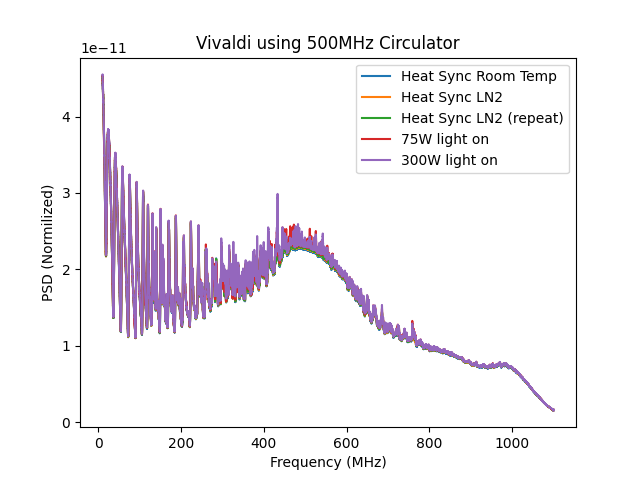

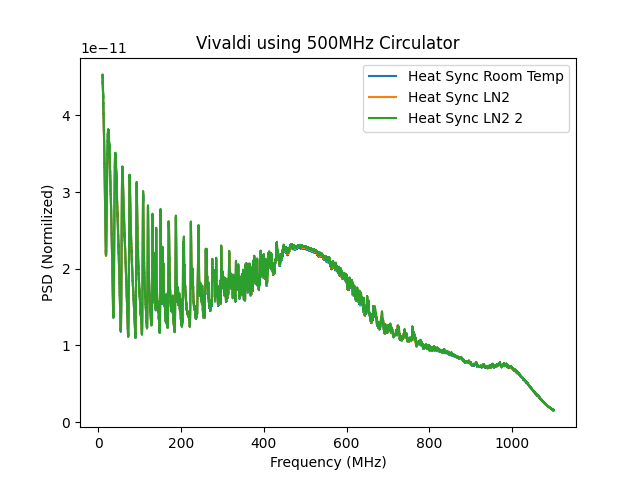

In [28]:
#break equlibrium with hot and cold objects
plt.close('all')


plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (heatSyncRT)[startIdx:stopIdx], label = 'Heat Sync Room Temp')
plt.plot(freqs[startIdx:stopIdx], (heatSyncCold)[startIdx:stopIdx], label = 'Heat Sync LN2')
plt.plot(freqs[startIdx:stopIdx], (heatSyncCold2)[startIdx:stopIdx], label = 'Heat Sync LN2 (repeat)')
plt.plot(freqs[startIdx:stopIdx], (light75W)[startIdx:stopIdx], label = '75W light on')
plt.plot(freqs[startIdx:stopIdx], (light300W)[startIdx:stopIdx], label = '300W light on')
#plt.plot(freqs[startIdx:stopIdx], (light75W2)[startIdx:stopIdx], label = '75W light on Repeat')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()


# Note that a drift of 0.01e-11 W is about 1K change OR the gain changing by 0.01dB!
# looking at system instability
#Wolfram "code": 2.29e-11Watts/10^(7.8 - 2.1 - 0.001  ) / (boltzmn constant * 9.5kHz) 
# Heat sync hot and cold doesn't seem to do anything

plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (heatSyncRT)[startIdx:stopIdx], label = 'Heat Sync Room Temp')
plt.plot(freqs[startIdx:stopIdx], (heatSyncCold)[startIdx:stopIdx], label = 'Heat Sync LN2')
plt.plot(freqs[startIdx:stopIdx], (heatSyncCold2)[startIdx:stopIdx], label = 'Heat Sync LN2 2')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$S_\\mathbf{o}^\\mathrm{norm}$ [None]')

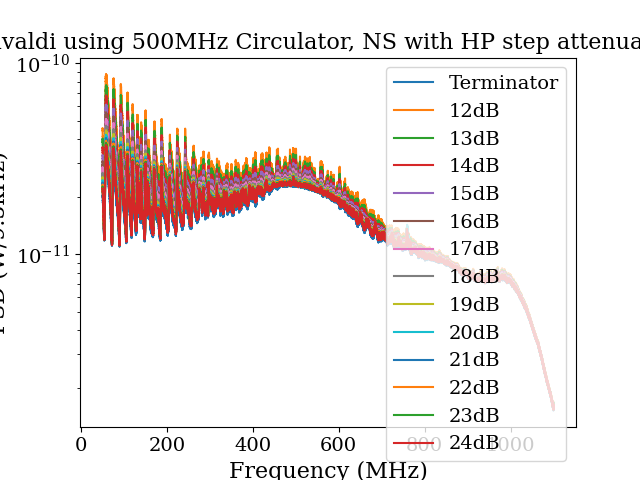

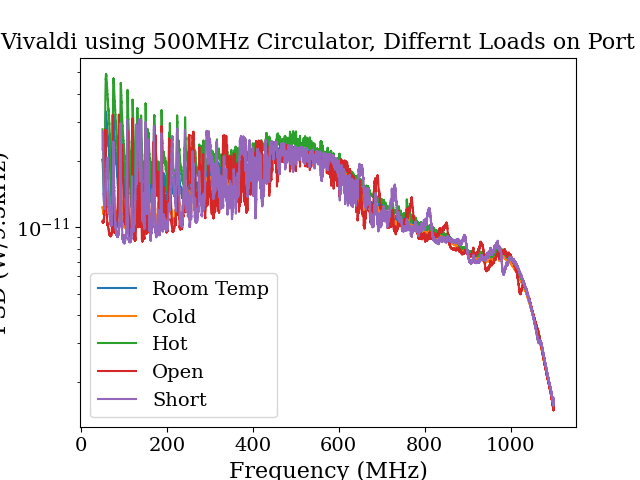

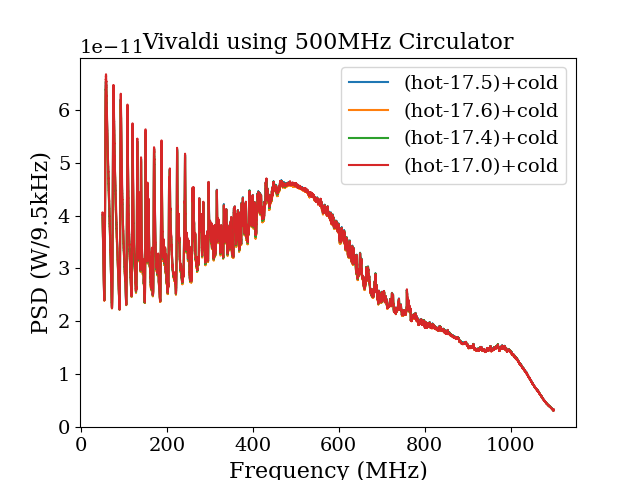

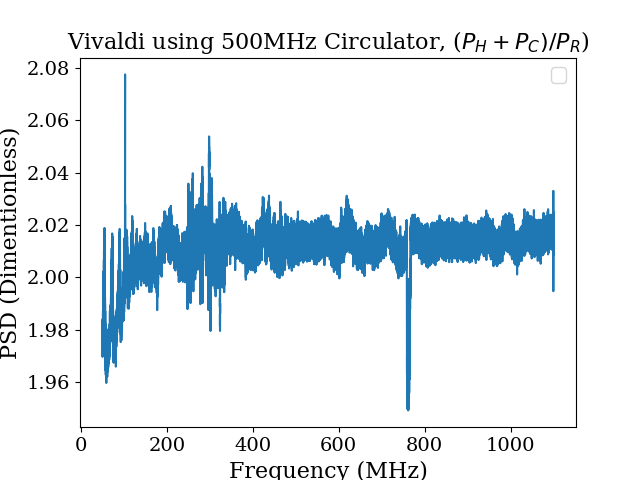

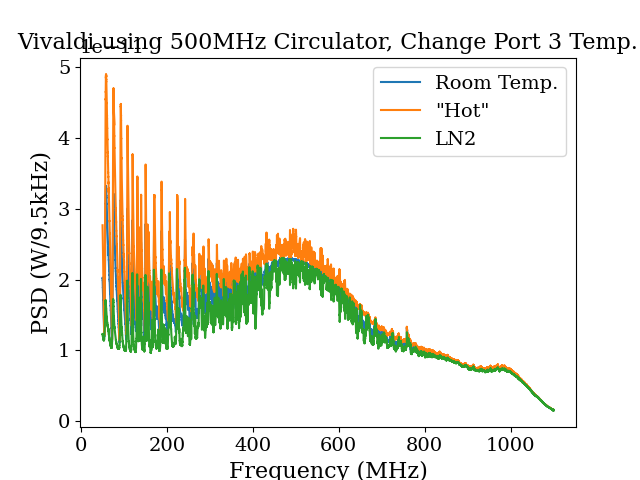

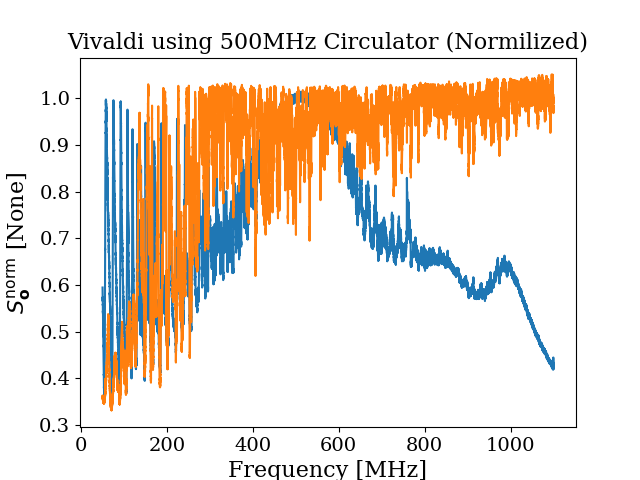

In [143]:
#vivaldi
#Circ port 1,2,3 = [vivaldi, patch, NS, 18.0 dB att (via patch)]
#1M avg
fileName        = 'vivaldi_circ_NS_18p0dBatt_18.npy' 
Vivaldi_hot_18p0dB = np.load('./data_10_15_23_gitignore/' + fileName, allow_pickle = True).item()['chBSpec_W']
plt.close('all')

'''
#caption tells what is on port 3 of circulator(on patch)
plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT/termOnPatch)[startIdx:stopIdx], label = 'Room temp')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2/termOnPatch)[startIdx:stopIdx], label = 'LN2')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()


plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT)[startIdx:stopIdx], label = 'Room temp')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2)[startIdx:stopIdx], label = 'LN2')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()

plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT - Vivaldi_LN2)[startIdx:stopIdx], label = 'Room temp')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p5dB - Vivaldi_RT )[startIdx:stopIdx], label = 'hot-17.5dB')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()


plt.figure()
plt.title('Vivaldi using 500MHz Circulator, Set through Hot Temps')
#plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p5dB  )[startIdx:stopIdx], label = 'hot-12dB')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT)[startIdx:stopIdx], label = 'Room temp')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2  )[startIdx:stopIdx], label = 'cold')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()

plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
#plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p5dB  )[startIdx:stopIdx], label = 'hot-17.5')
#plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p6dB  )[startIdx:stopIdx], label = 'hot-17.6')
#plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p4dB  )[startIdx:stopIdx], label = 'hot-17.4')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_15p0dB  )[startIdx:stopIdx], label = 'hot-15.0')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_16p0dB  )[startIdx:stopIdx], label = 'hot-16.0')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p0dB  )[startIdx:stopIdx], label = 'hot-17.0')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_18p0dB  )[startIdx:stopIdx], label = 'hot-18.0')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_19p0dB  )[startIdx:stopIdx], label = 'hot-19.0')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_20p0dB  )[startIdx:stopIdx], label = 'hot-20.0')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT)[startIdx:stopIdx], label = 'Room temp')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2  )[startIdx:stopIdx], label = 'cold')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()
'''

#Same test but with HP for 1 dB resolution across 12dB total
plt.figure()
plt.title('Vivaldi using 500MHz Circulator, NS with HP step attenuator')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_off)[startIdx:stopIdx], label = 'Terminator')
#plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_0)[startIdx:stopIdx], label = '0dB')
#plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_6)[startIdx:stopIdx], label = '6dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_12)[startIdx:stopIdx], label = '12dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_13)[startIdx:stopIdx], label = '13dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_14)[startIdx:stopIdx], label = '14dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_15)[startIdx:stopIdx], label = '15dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_16)[startIdx:stopIdx], label = '16dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_17)[startIdx:stopIdx], label = '17dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_18)[startIdx:stopIdx], label = '18dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_19)[startIdx:stopIdx], label = '19dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_20)[startIdx:stopIdx], label = '20dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_21)[startIdx:stopIdx], label = '21dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_22)[startIdx:stopIdx], label = '22dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_23)[startIdx:stopIdx], label = '23dB')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_hot_24)[startIdx:stopIdx], label = '24dB')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()
plt.semilogy()

#Compare open, hot, cold, term on port 3 of circ
plt.figure()
plt.title('Vivaldi using 500MHz Circulator, Differnt Loads on Port 3')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_RT)[startIdx:stopIdx], label = 'Room Temp')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_LN2)[startIdx:stopIdx], label = 'Cold')
plt.plot(freqs[startIdx:stopIdx], (Vivaldi_hot_17p5dB)[startIdx:stopIdx], label = 'Hot')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_open)[startIdx:stopIdx], label = 'Open')
plt.plot(freqs[startIdx:stopIdx], (vivaldi_short)[startIdx:stopIdx], label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()
plt.semilogy()


plt.figure()
plt.title('Vivaldi using 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p5dB + Vivaldi_LN2) )[startIdx:stopIdx], label = '(hot-17.5)+cold')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p6dB + Vivaldi_LN2) )[startIdx:stopIdx], label = '(hot-17.6)+cold')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p4dB + Vivaldi_LN2) )[startIdx:stopIdx], label = '(hot-17.4)+cold')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p0dB + Vivaldi_LN2) )[startIdx:stopIdx], label = '(hot-17.0)+cold')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()


plt.figure()
plt.title(f'Vivaldi using 500MHz Circulator, ($P_H+P_C)/P_R$)')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p5dB + Vivaldi_LN2)/(Vivaldi_RT ) )[startIdx:stopIdx])
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Dimentionless)')
plt.legend()

plt.figure()
plt.title('Vivaldi using 500MHz Circulator, Change Port 3 Temp.')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_RT ) )[startIdx:stopIdx], label = 'Room Temp.')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_hot_17p5dB ) )[startIdx:stopIdx], label = '"Hot"')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_LN2 ) )[startIdx:stopIdx], label = 'LN2')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()


plt.figure()
plt.title('Vivaldi using 500MHz Circulator (Normilized)')
plt.plot(freqs[startIdx:stopIdx], ((Vivaldi_RT/termOnPatch))[startIdx:stopIdx])
plt.plot(freqs[startIdx:stopIdx], ((vivaldi/termOnPatch) )[startIdx:stopIdx])
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
#plt.legend()


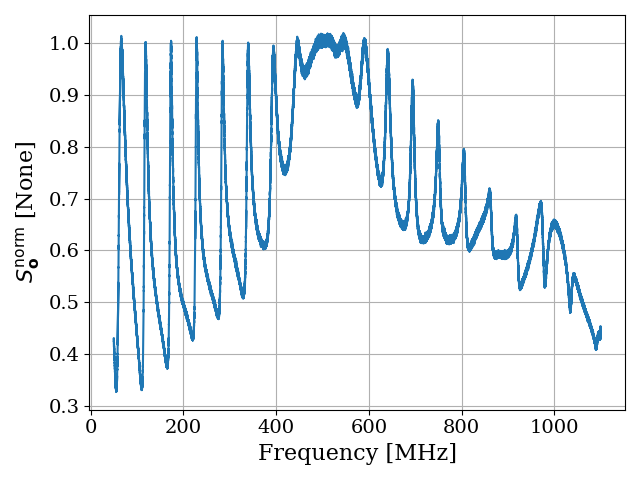

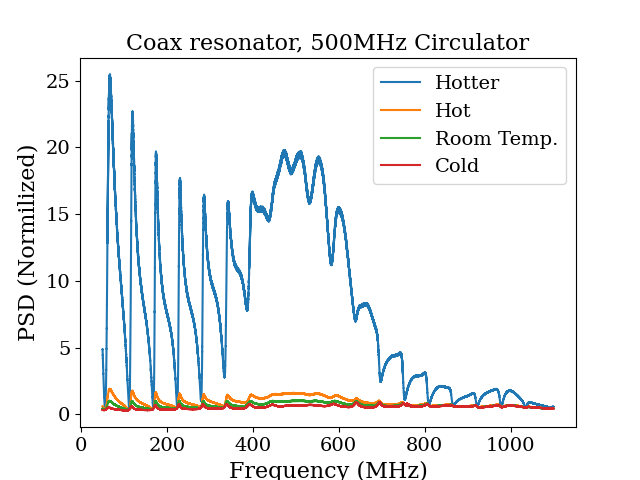

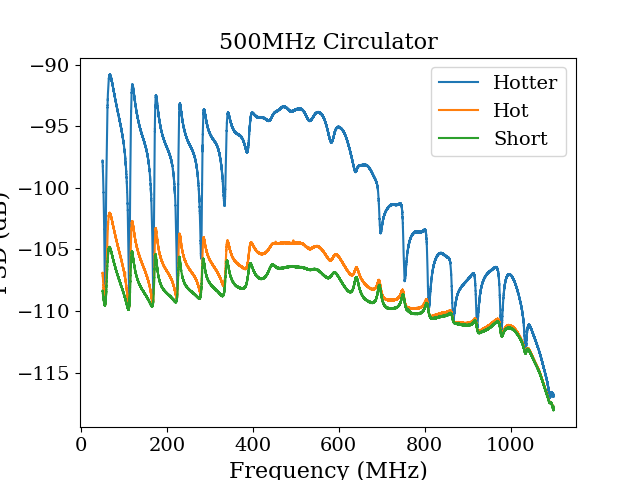

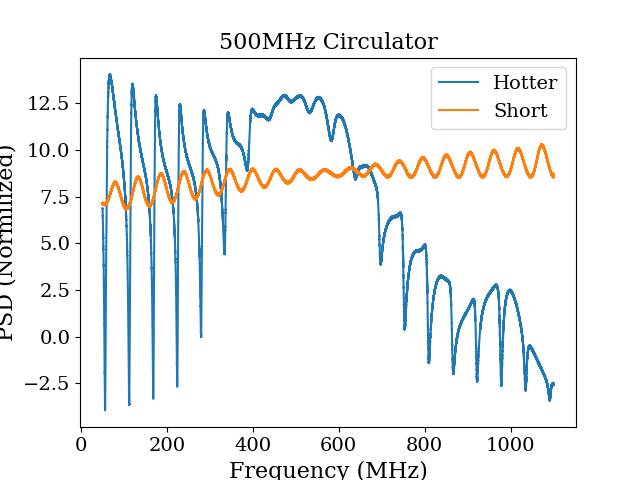

In [74]:
plt.close('all')


plt.figure()
#plt.title('Coax resonator, 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc/termOnPatch)[startIdx:stopIdx], label = 'Room Temp.')
plt.xlabel('Frequency [MHz]')
plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
plt.grid()
plt.tight_layout()

plt.figure()
plt.title('Coax resonator, 500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc_NS0dBatt/termOnPatch)[startIdx:stopIdx], label = 'Hotter')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc_NS12dBatt/termOnPatch)[startIdx:stopIdx], label = 'Hot')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc/termOnPatch)[startIdx:stopIdx], label = 'Room Temp.')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc_LN2/termOnPatch)[startIdx:stopIdx], label = 'Cold')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

plt.figure()
plt.title('500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], 10*np.log10(shortOnCableCirc_NS0dBatt)[startIdx:stopIdx], label = 'Hotter')
plt.plot(freqs[startIdx:stopIdx], 10*np.log10(shortOnCableCirc_NS12dBatt)[startIdx:stopIdx], label = 'Hot')
plt.plot(freqs[startIdx:stopIdx], 10*np.log10(shortOnCableCirc)[startIdx:stopIdx], label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (dB)')
plt.legend()

plt.figure()
plt.title('500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], 10*np.log10(shortOnCableCirc_NS0dBatt/termOnPatch)[startIdx:stopIdx], label = 'Hotter')
plt.plot(freqs[startIdx:stopIdx], 10*np.log10((shortOnCable/termOnPatch))[startIdx:stopIdx]+12, label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

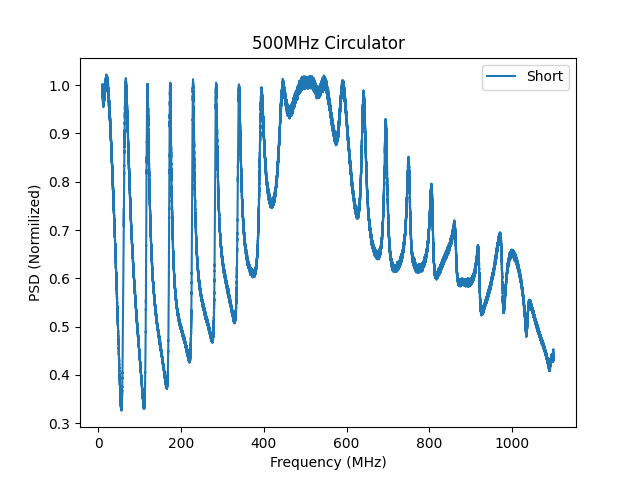

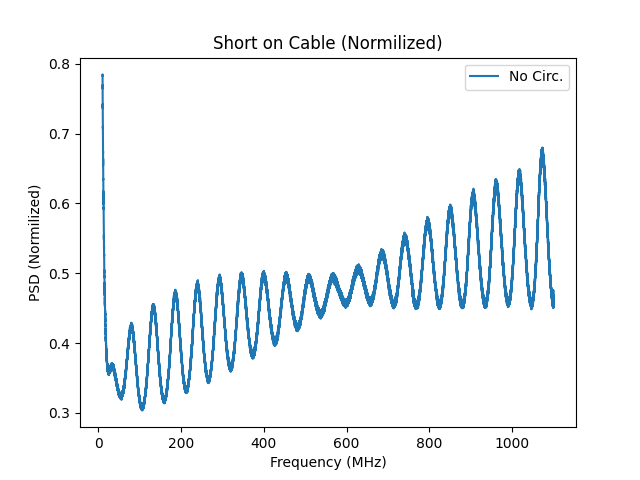

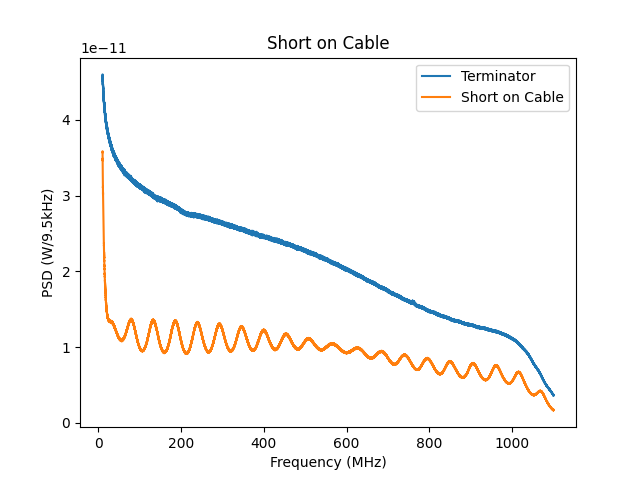

In [31]:
plt.close('all')

plt.figure()
plt.title('500MHz Circulator')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc/termOnPatch)[startIdx:stopIdx], label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

plt.figure()
plt.title('Short on Cable (Normilized)')
#plt.plot(freqs[startIdx:stopIdx], (shortOnCableCirc)[startIdx:stopIdx], label = 'Circ.')
plt.plot(freqs[startIdx:stopIdx], (shortOnCable/termOnPatch)[startIdx:stopIdx], label = 'No Circ.')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()


plt.figure()
plt.title('Short on Cable')
plt.plot(freqs[startIdx:stopIdx], (termOnPatch)[startIdx:stopIdx], label = 'Terminator')
plt.plot(freqs[startIdx:stopIdx], (shortOnCable)[startIdx:stopIdx], label = 'Short on Cable')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()


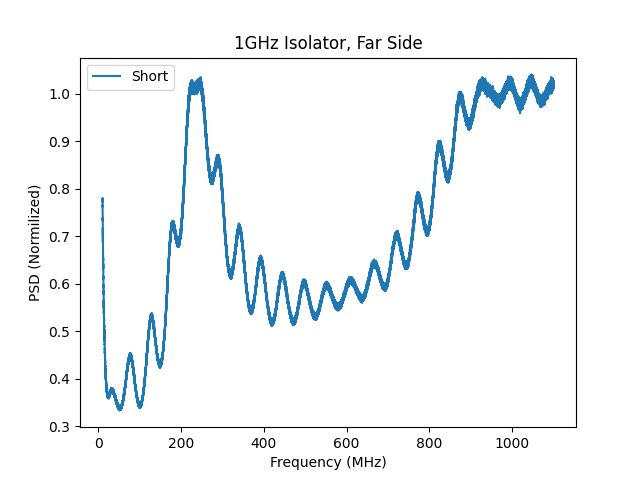

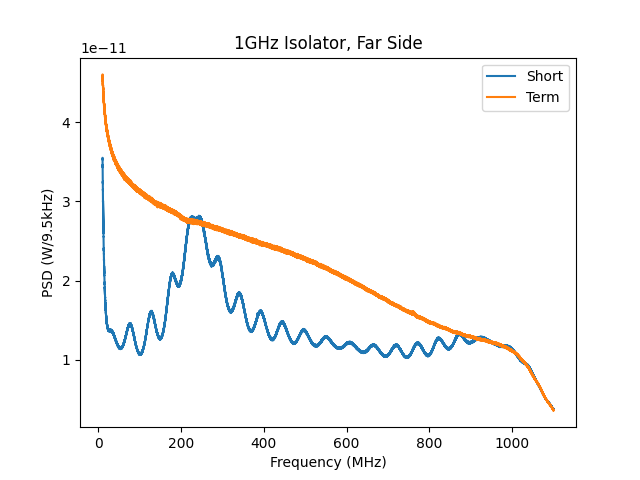

In [32]:
plt.close('all')

plt.figure()
plt.title('1GHz Isolator, Far Side')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableIsolatorFarSide/termOnPatch)[startIdx:stopIdx], label = 'Short')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

plt.figure()
plt.title('1GHz Isolator, Far Side')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableIsolatorFarSide)[startIdx:stopIdx], label = 'Short')
plt.plot(freqs[startIdx:stopIdx], (termOnPatch)[startIdx:stopIdx], label = 'Term')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.legend()

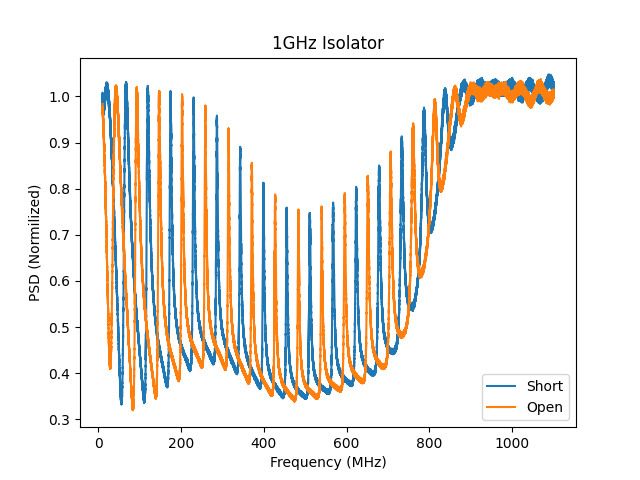

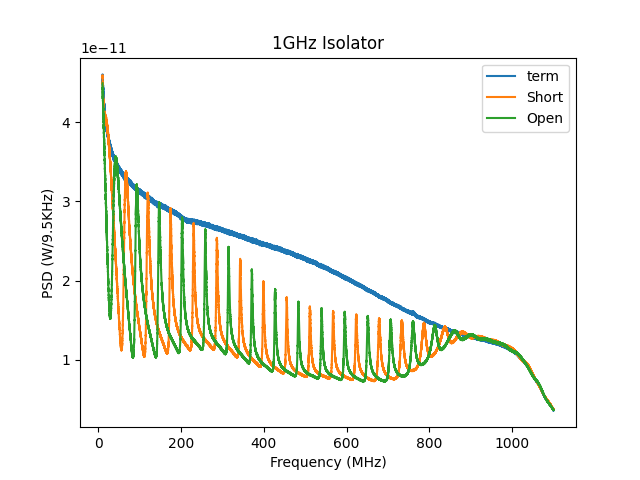

In [33]:
plt.close('all')
plt.figure()
plt.title('1GHz Isolator')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableIsolator/termOnPatch)[startIdx:stopIdx], label = 'Short')
plt.plot(freqs[startIdx:stopIdx], (openOnCableIsolator/termOnPatch)[startIdx:stopIdx], label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')
plt.legend()

plt.figure()
plt.title('1GHz Isolator')
plt.plot(freqs[startIdx:stopIdx], (termOnPatch)[startIdx:stopIdx], label = 'term')
plt.plot(freqs[startIdx:stopIdx], (shortOnCableIsolator)[startIdx:stopIdx], label = 'Short')
plt.plot(freqs[startIdx:stopIdx], (openOnCableIsolator)[startIdx:stopIdx], label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5KHz)')
plt.legend()

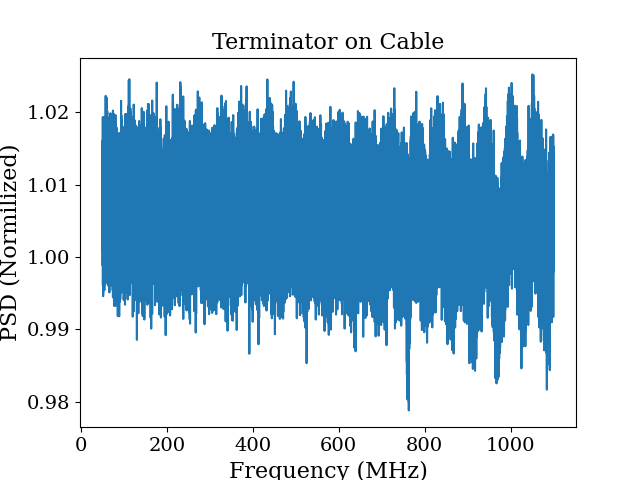

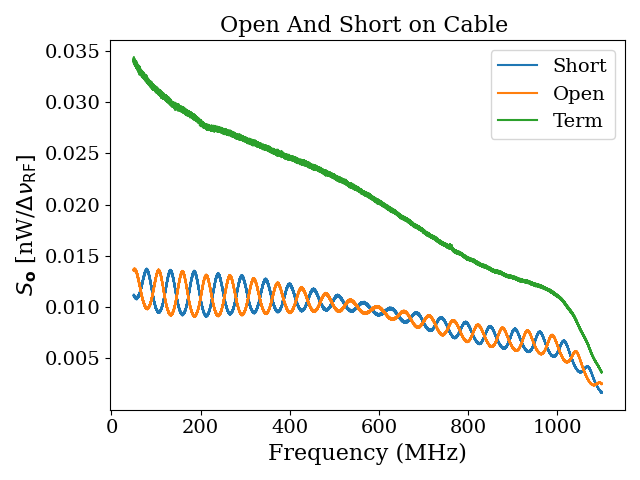

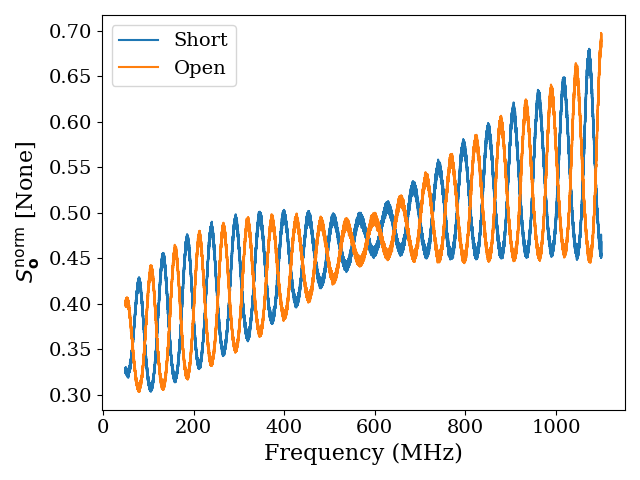

In [75]:
plt.close('all')
plt.figure()
plt.title('Terminator on Cable')
plt.plot(freqs[startIdx:stopIdx], (termOnCable/termOnPatch)[startIdx:stopIdx])
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (Normilized)')


plt.figure()
plt.title('Open And Short on Cable ')
plt.plot(freqs[startIdx:stopIdx], 1e9*(shortOnCable)[startIdx:stopIdx], label = 'Short')
plt.plot(freqs[startIdx:stopIdx], 1e9*(openOnCable)[startIdx:stopIdx], label = 'Open')
plt.plot(freqs[startIdx:stopIdx], 1e9*(termOnPatch)[startIdx:stopIdx], label = 'Term')
plt.xlabel('Frequency (MHz)')
plt.ylabel(r'$S_\mathbf{o}$ [nW/$\Delta \nu_\mathrm{RF}]$')
plt.legend(loc = 'upper right')
plt.tight_layout()

plt.figure()
#plt.title('Open And Short on Cable (Normilized)')
plt.plot(freqs[startIdx:stopIdx], (shortOnCable/termOnPatch)[startIdx:stopIdx], label = 'Short')
plt.plot(freqs[startIdx:stopIdx], (openOnCable/termOnPatch)[startIdx:stopIdx], label = 'Open')
plt.xlabel('Frequency (MHz)')
plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
#plt.ylabel('PSD (Normilized)')
plt.legend()
plt.tight_layout()

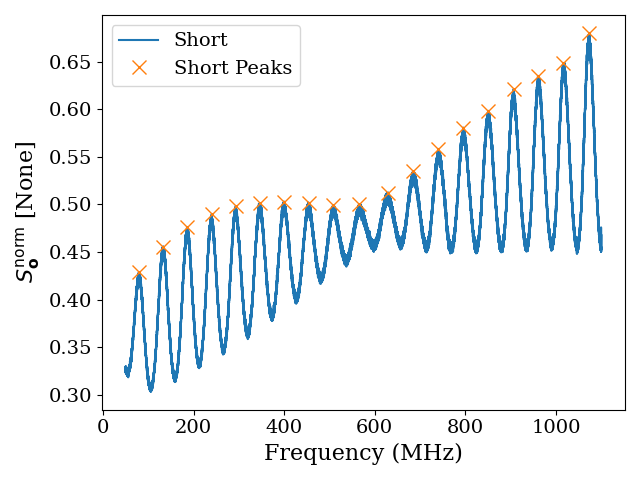

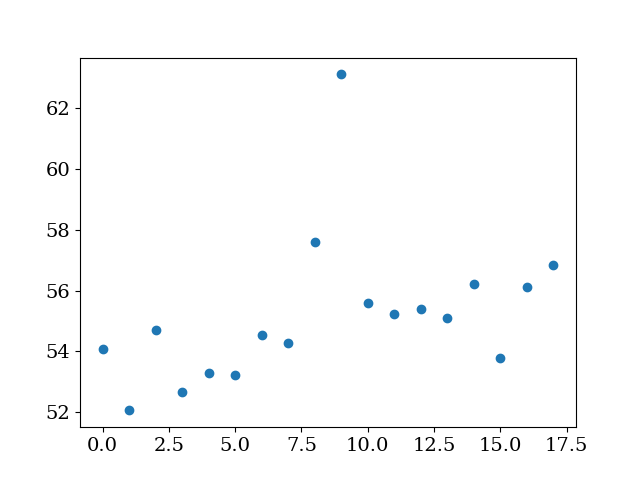

55.212865970012864
2.375697271507502


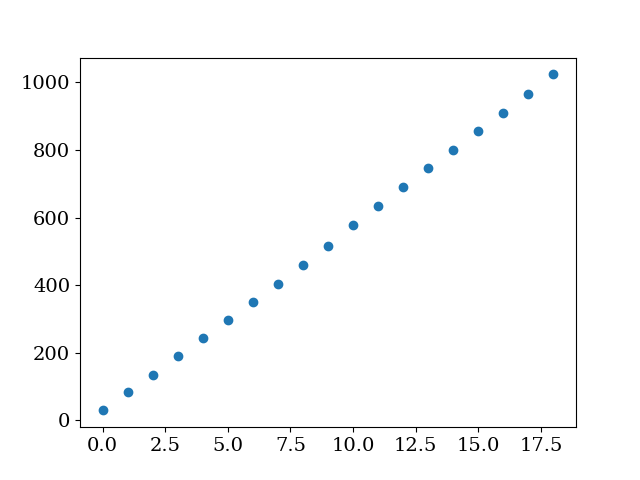

[28175675.675675675, 84527027.02702703, 140878378.37837836, 197229729.7297297, 253581081.08108106, 309932432.4324324, 366283783.7837838, 422635135.1351351, 478986486.48648643, 535337837.8378378, 591689189.1891892, 648040540.5405405, 704391891.8918918, 760743243.2432432, 817094594.5945946, 873445945.9459459, 929797297.2972972, 986148648.6486486]
[56.35135135 56.35135135 56.35135135 56.35135135 56.35135135 56.35135135
 56.35135135 56.35135135 56.35135135 56.35135135 56.35135135 56.35135135
 56.35135135 56.35135135 56.35135135 56.35135135 56.35135135]


In [71]:
#process data to find distance between peaks in coax resonator

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example arrays for frequency and normalized data
short_data =   (shortOnCable/termOnPatch)[startIdx:stopIdx] # Replace with your 'short' data
#open_data = np.sin(freqs / 105) + 0.3 * np.sin(freqs / 10.5)  # Replace with your 'open' data

# Find peaks in the short data
peaks, _ = find_peaks(short_data, prominence=0.045, distance=2500)

# Find peaks in the open data
#open_peaks, _ = find_peaks(open_data, prominence=0.05, distance=20)

predictedFreqs = []
for i in range(1,len(peaks)):
    predictedFreqs.append((3e8 * 0.695*(2*i-1)/(4*1.85)))

# Plotting the results
plt.figure()
plt.plot(freqs[startIdx:stopIdx], short_data, label='Short')
#plt.plot(freqs, open_data, label='Open')
plt.plot(freqs[startIdx:stopIdx][peaks], short_data[peaks], "x", label='Short Peaks', markersize=10)
#plt.plot(freqs[startIdx:stopIdx][peaks], predictedFreqs, "x", label='Short Peaks', markersize=10)
#plt.plot(freqs[open_peaks], open_data[open_peaks], "o", label='Open Peaks', markersize=8)
plt.xlabel('Frequency (MHz)')
plt.ylabel(r'$S_\mathbf{o}^\mathrm{norm}$ [None]')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(np.arange(0, len(peaks)-1, 1), np.diff(freqs[startIdx:stopIdx][peaks]))
plt.show()

print(np.average(np.diff(freqs[startIdx:stopIdx][peaks])))
print(np.std(np.diff(freqs[startIdx:stopIdx][peaks])))

plt.figure()
plt.scatter(np.arange(0, len(peaks), 1), freqs[peaks])
plt.show()

print(predictedFreqs)
print(np.diff(predictedFreqs)/1e6)

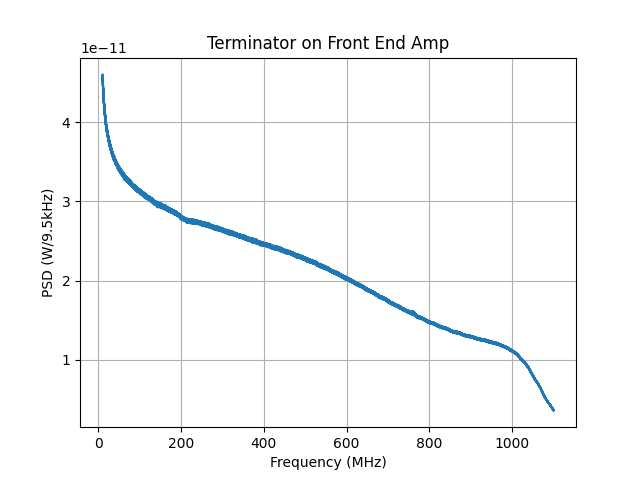

In [35]:
plt.close('all')
plt.figure()
plt.title('Terminator on Front End Amp')
plt.plot(freqs[startIdx:stopIdx], termOnPatch[startIdx:stopIdx])
plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD (W/9.5kHz)')
plt.grid(True)



ValueError: operands could not be broadcast together with shapes (131073,) (114295,) 

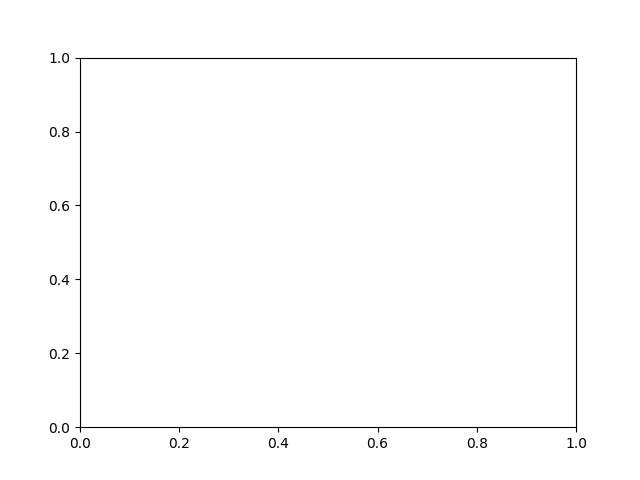

In [36]:
plt.close('all')
plt.figure()
plt.title('')
plt.plot(freqs[startIdx:stopIdx], termOnPatch/termOnCable[startIdx:stopIdx])
plt.xlabel('Frequency (MHz)')
plt.ylabel('')